In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv(r'/Users/randika/Desktop/Preprocessed_dataset.csv')

In [3]:
# Import train_test_split function

from sklearn.model_selection import train_test_split

#read the dataset into a data-frame.
X=df[['price', 'sqfeet', 'beds', 'baths', 'smoking_allowed', 'wheelchair_access', 'electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options', 'state']]  # Selected Features
y=df['pets_allowed']  # Labels[1 | 0]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,random_state = 1) # 70% training and 30% test

In [4]:
#Build the Model using Multi-layer Perceptron classifier
#MLPClassifier relies on an underlying Neural Network to perform the task of classification.

#import MLP Classifier
from sklearn.neural_network import MLPClassifier

#assigning MLP classifier to a variable and declaring it
nn_clf = MLPClassifier()

#fitting the training data to the network
nn_clf.fit(X_train , y_train)

#predicting y for X_test
y_pred=nn_clf.predict(X_test) #These are the predicted output values

In [5]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred) * 100)

Accuracy: 77.45559661461438


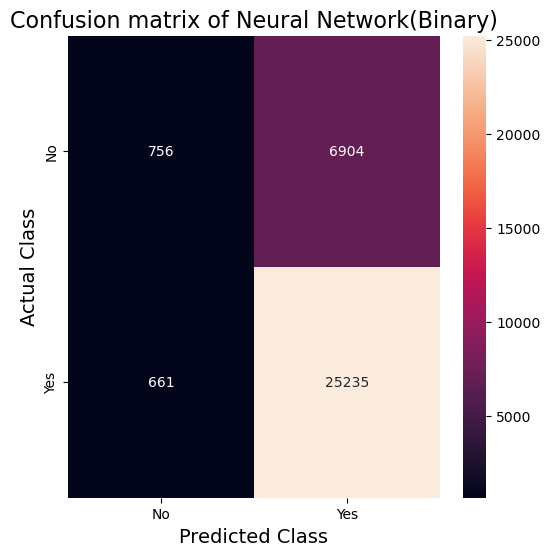

In [6]:
#confusion matrix creation
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(y_test,y_pred)

#Plot the Confusion Matrix
LABELS=['No','Yes']
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS,yticklabels=LABELS, annot=True, fmt='d');
plt.title('Confusion matrix of Neural Network(Binary)',size = 16)
plt.ylabel('Actual Class',size = 14)
plt.xlabel('Predicted Class',size = 14)
plt.show()

In [7]:
#Array formatted confusion matrix

Predicted = pd.Categorical(list(np.where(np.array(y_test) == 1, 'Pet Allowed','Pet Not Allowed')), categories = ['Pet Allowed','Pet Not Allowed'])
Actual = pd.Categorical(list(np.where(np.array(y_pred) == 1, 'Pet Allowed','Pet Not Allowed')), categories = ['Pet Allowed','Pet Not Allowed'])

pd.crosstab(Actual, Predicted, 
            rownames=['Predicted Class'], 
            colnames=['Actual Class'], margins=True, margins_name="Total Amount")

Actual Class,Pet Allowed,Pet Not Allowed,Total Amount
Predicted Class,,,
Pet Allowed,25235,6904,32139
Pet Not Allowed,661,756,1417
Total Amount,25896,7660,33556
